# Neutrino underwater acoustic propagation modeling at Tanganyika

In [7]:
# Author : Lene van Rootselaar
from math import *
import math
import matplotlib.pyplot as plt
import arlpy.uwapm as pm
import numpy as np

## Bellhop - Acoustic Toolbox

- **BELLHOP** reads these files depending on options selected within the main environmental file.

- i.e. Below is the example of the environmental file(*.env file).
    

- There are various options for which you can run bellhop are: **(That can be found in the *.env file as RUN TYPE)**
    - ray tracing option (R),
    - eigenray option (E),
    - transmission loss option ,
        - Coherent TL calculations (C)
        - Incoherent TL calculations (I)
        - Semi-coherent TL calculations (S)
    - an arrivals calculation option in ascii (A) ; an arrivals calculation option in binary (a)

# Sound Speed Profile of Tanganyika 

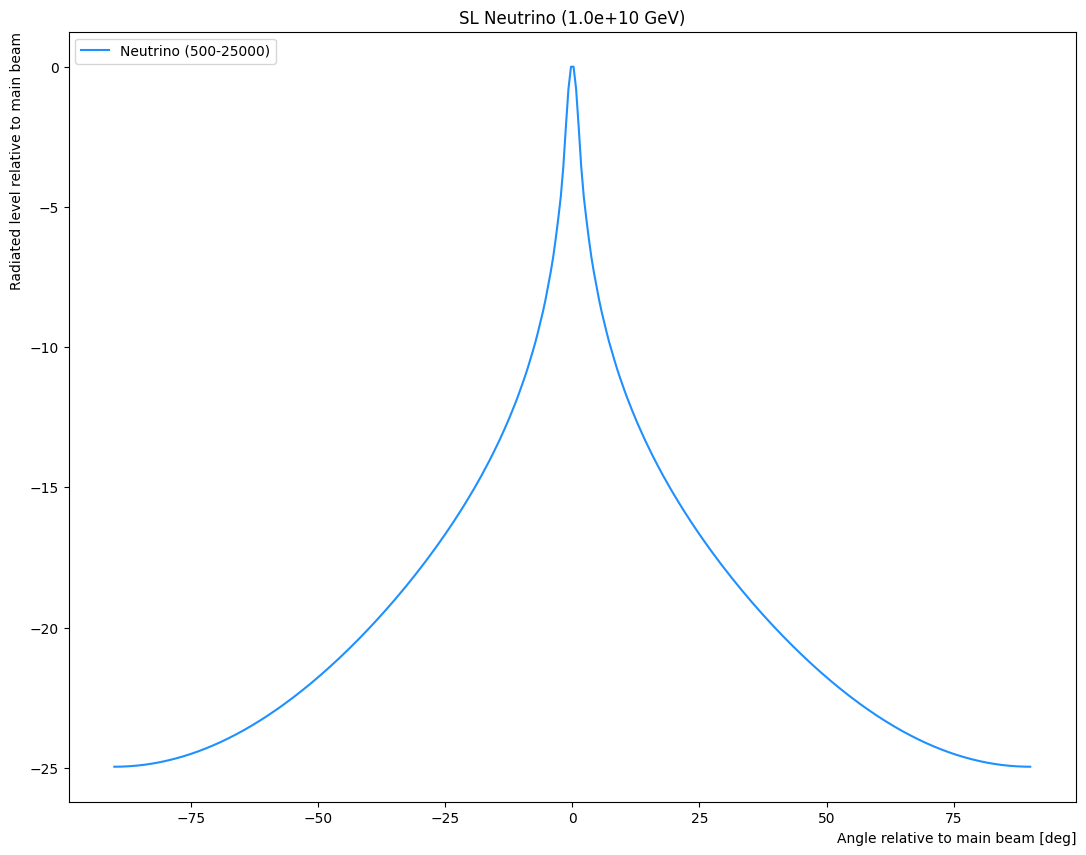

<Figure size 640x480 with 0 Axes>

In [8]:
neutrino_energy = 1e10

def sound_level_Neutrino():
    """
    Generates the sound level (SL) distribution over angle for a neutrino
    """
    ###########################################################################################################################
    # set up the conditions to calculate sound level for the sperm whale and neutrino 
    ###########################################################################################################################        
    # angle w.r.t. axis of click [rad]
    thetas = np.linspace(-90, 90, 360)
    SL_thetas = []

    ###########################################################################################################################
    # Calculate the sound level for the neutrino in a similar manner
    
    ########################################################################################################################### 
    
    # Generate an array of frequencies from 5000 to 50000
    f_arr = np.linspace(500, 25000, 100) # 500 - 25000
    #f_arr = freqs[1:]
    #f_arr = np.linspace(freqs[1], freqs[len(freqs) - 1], 100)
    I_theta = np.zeros(len(thetas))

    # Loop over the frequencies and calculate the intensity of the neutrino at different angles
    for freq in f_arr:
        I_theta += np.asarray(list(map(correct_offaxis_neutrino, np.radians(thetas), [freq]*len(thetas))))

    # calculate the average intensity of the signal over different frequencies
    I_theta_mean = np.asarray(I_theta) / len(f_arr)
    
    # get the sound level relative to the original neutrino sound in log scale
    SL_thetas = [10*math.log10(x) for x in I_theta_mean]
    
    # from all the values in the list substract the maximum values such that all identities are negative and 0 is the maximum
    SL_thetas -= np.max(SL_thetas)      
    
    return SL_thetas, I_theta

def correct_offaxis_neutrino(theta, freq):
    # distance from the source to the detector, assumed to be 1 unit
    d = 2
    
    c_s = 1497
    
    # wavelength of the underwater signal which is speed of sound divided by the frequency
    wl = c_s/freq
    
    # initial intensity of the signal (assumed to be 1 unit)
    I_0 = 1
    
    # below the formula to find the intensity of a signal under different angles is used
    if theta == 0:
        return I_0
    else:
        return I_0 * pow(np.sin((np.pi*d/wl)*np.sin(theta))/((np.pi*d/wl)*np.sin(theta)), 2)

SL_Neutrino, I_theta = sound_level_Neutrino()

thetas = np.linspace(-90, 90, 360)

SL_Neutrino_normalised = (SL_Neutrino - min(SL_Neutrino)) / (max(SL_Neutrino - min(SL_Neutrino)))

# plot the absolute graph
plt.figure(figsize=(13, 10))
plt.title(f'SL Neutrino ({neutrino_energy:.1e} GeV)')

plt.plot(thetas, SL_Neutrino, '-', label = 'Neutrino (500-25000)', color= 'dodgerblue')
#plt.plot(thetas, SL_Neutrino_sharp, '-', label = 'Neutrino (freqs)', color= 'gold')
plt.legend(loc=2)
plt.xlabel("Angle relative to main beam [deg]", ha ='right', x=1.0)
plt.ylabel("Radiated level relative to main beam",   ha ='right', position=(0,1))

plt.show()
plt.clf()

# beam pattern
beampattern = np.column_stack((thetas, SL_Neutrino*10))

In [10]:
import arlpy.plot as plt

env = pm.create_env2d()

ssp = [
    [   0, 1503.89725749], 
    [   5, 1503.53512228],
    [  27, 1503.40633872],
    [  45, 1501.17598527],
    [  63, 1497.95739375],
    [  91, 1496.57667752],
    [ 120, 1496.18094787],
    [ 144, 1496.13991023],
    [ 168, 1496.23668012],
    [ 187, 1496.33233254],
    [ 216, 1496.82067334],
    [ 250, 1497.30878916],
    [ 300, 1497.98142059],
    [ 350, 1498.79460352],
    [ 400, 1499.46622159], 
    [ 450, 1500.36382161],
    [ 625, 1503.19287932],
    [ 721, 1504.83479986], 
    [ 818, 1506.35078556],
    [ 867, 1507.14541936],
    [1500, 1517.77346984]]   

constant_ssp = [
    [   0, 1500], 
    [   5, 1500],
    [  27, 1500],
    [  45, 1500],
    [  63, 1500],
    [  91, 1500],
    [ 120, 1500],
    [ 144, 1500],
    [ 168, 1500],
    [ 187, 1500],
    [ 216, 1500],
    [ 250, 1500],
    [ 300, 1500],
    [ 350, 1500],
    [ 400, 1500], 
    [ 450, 1500],
    [ 625, 1500],
    [ 721, 1500], 
    [ 818, 1500],
    [ 867, 1500],
    [ 900, 1500],
    [ 950, 1500],    
    [1000, 1500],
    [1050, 1500],
    [1100, 1500],
    [1150, 1500],
    [1200, 1500],
    [1250, 1500],
    [1300, 1500],
    [1350, 1500],
    [1400, 1500],
    [1450, 1500],
    [1500, 1500]]   

# Create the 2D environment with a pancake opening angle of 5 degrees
#env = pm.create_env2d(frequency=10000, min_angle=-5, max_angle=5, depth=1500, tx_depth=[750, 753, 756, 759, 762, 765], rx_depth=[1425, 1350, 1275, 1200, 1125, 1050, 975, 900, 825, 750, 675, 600, 525], rx_range=48000, soundspeed=ssp)
env = pm.create_env2d(frequency=10000, min_angle=-5, max_angle=5, depth=1500, tx_depth=900, tx_directionality=beampattern, rx_depth=[525, 1425, 1350, 1275, 1200, 1125, 1050, 975, 900, 825, 750, 675, 600], rx_range=70000, soundspeed=ssp)
constant_env = pm.create_env2d(frequency=10000, min_angle=-5, max_angle=5, depth=1500, tx_depth=900, rx_depth=[525, 1425, 1350, 1275, 1200, 1125, 1050, 975, 900, 825, 750, 675, 600], rx_range=70000, soundspeed=ssp)

# Plot the sound speed profile
pm.plot_ssp(env, width=500)
pm.plot_ssp(constant_env, width=500)

pm.print_env(env)

                name : arlpy
   bottom_absorption : 0.1
      bottom_density : 1600
    bottom_roughness : 0
   bottom_soundspeed : 1600
               depth : 1500
        depth_interp : linear
           frequency : 10000
           max_angle : 5
           min_angle : -5
              nbeams : 0
            rx_depth : [ 525. 1425. 1350. 1275. 1200. 1125. 1050.  975.  900.  825.  750.  675.
                         600.]
            rx_range : 70000
          soundspeed : [[   0.         1503.89725749]
                        [   5.         1503.53512228]
                        [  27.         1503.40633872]
                        [  45.         1501.17598527]
                        [  63.         1497.95739375]
                        [  91.         1496.57667752]
                        [ 120.         1496.18094787]
                        [ 144.         1496.13991023]
                        [ 168.         1496.23668012]
                        [ 187.         1496.33233254]
    

In [4]:
pm.models()

['bellhop']

# Plotting an Environment

In [11]:
# Plotting an Environment using ARLPY
pm.plot_env(env, surface_color='dodgerblue', bottom_color='peru', rx_color='blue', rx_plot=None, width=900)

# Eigenrays

- **Eigenray** plots show just the rays that connect the source to a receiver.

In [3]:
# Eigenrays using ARLPY
rays = pm.compute_eigenrays(env)
print(rays)
pm.plot_rays(rays, env=env, width=900)

   angle_of_departure  surface_bounces  bottom_bounces  \
0           -0.513397                3               0   
0           -0.513325                3               0   
0            3.595276                2               0   

                                                 ray  
0  [[0.0, 900.0], [149.99282777091292, 898.527515...  
0  [[0.0, 900.0], [149.99282960639826, 898.527702...  
0  [[0.0, 900.0], [149.71284024821827, 909.278288...  


In [12]:
rays = pm.compute_rays(env)
constant_rays = pm.compute_rays(constant_env)

pm.plot_rays(rays, env=env, width=900)
pm.plot_rays(constant_rays, env=constant_env, width=900)

In [1]:
depth = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300]


for i in range(0, len(depth)):
    tx = depth[i]
    env = pm.create_env2d(frequency=10000, min_angle=-5, max_angle=5, depth=1500, tx_depth=tx, rx_depth=[525, 1425, 1350, 1275, 1200, 1125, 1050, 975, 900, 825, 750, 675, 600], rx_range=48000, soundspeed=ssp)
    rays = pm.compute_rays(env)
    pm.plot_rays(rays, env=env, width=900)
    arrivals = pm.compute_arrivals(env)
    pm.plot_arrivals(arrivals, width=900)

NameError: name 'pm' is not defined

In [35]:
env = pm.create_env2d(frequency=10000, min_angle=-5, max_angle=5, depth=1500, tx_depth=150, rx_depth=[525, 1425, 1350, 1275, 1200, 1125, 1050, 975, 900, 825, 750, 675, 600], rx_range=48000, soundspeed=ssp)

# compute the arrival structure at the receiver
arrivals = pm.compute_arrivals(env)
pm.plot_arrivals(arrivals, width=900)

In [38]:
# convert to a impulse response time series
ir = pm.arrivals_to_impulse_response(arrivals, fs=96000)
plt.plot(np.abs(ir), fs=96000, width=900)

If you want the received signal strength (RSS) to be in the same units as the original signal strength, in this case, millipascal (mPa), you would need to convert the dB result back to the linear scale of the original units. The formula for this conversion is:

$$ RSS \: [mPa] = 10^{(\frac{RSS \: [dB]}{20})} $$

In [49]:
# We can see in the plots below that the signal strength reduces with about -120 dB
RSS = 10**(-140 / 20)

print(RSS)

minimum_value = (1 / RSS) * 5
print(f"for a neutrino being created 48 kilometers away, the minimum energy detectable can be {minimum_value} mPa.")



#signal of 10**4 mPa, how far?
original_energy = 10**3

minimum_value = 5 
RSS = minimum_value / original_energy
print(RSS)

reduce = np.log(RSS) * 20

print(reduce)





1e-07
for a neutrino being created 48 kilometers away, the minimum energy detectable can be 50000000.0 mPa.
0.005
-105.96634733096073


# Bathymetry

Let's first start off by defining our bathymetry, a steep up-slope for the first 300 m, and then a gentle downslope:

In [ ]:
# add/change bathy to env
bathy = [
    [0, 30],    # 30 m water depth at the transmitter
    [300, 20],  # 20 m water depth 300 m away
    [1000, 25]  # 25 m water depth at 1 km
]

# add/change SSP to env
ssp = [
    [ 0, 1540],  # 1540 m/s at the surface
    [10, 1530],  # 1530 m/s at 10 m depth
    [20, 1532],  # 1532 m/s at 20 m depth
    [25, 1533],  # 1533 m/s at 25 m depth
    [30, 1535]   # 1535 m/s at the seabed
]

# Appending ssp and bathy to existing env file
env = pm.create_env2d(
    depth=bathy,
    soundspeed=ssp,
    bottom_soundspeed=1450,
    bottom_density=1200,
    bottom_absorption=1.0,
    tx_depth=15
)
pm.print_env(env)

In [ ]:
pm.plot_env(env, width=900)

Looks more interesting! Let's see what the eigenrays look like, and also the arrival structure:

In [ ]:
rays = pm.compute_eigenrays(env)
pm.plot_rays(rays, env=env, width=900)

We could also ignore the receiver, and plot rays launched at various angles:

In [ ]:
rays = pm.compute_rays(env)
pm.plot_rays(rays, env=env, width=900)

# Source directionality

Now, let's use a directional transmitter instead of an omni-directional one:

In [ ]:
beampattern = np.array([
    [-180,  10], [-170, -10], [-160,   0], [-150, -20], [-140, -10], [-130, -30],
    [-120, -20], [-110, -40], [-100, -30], [-90 , -50], [-80 , -30], [-70 , -40],
    [-60 , -20], [-50 , -30], [-40 , -10], [-30 , -20], [-20 ,   0], [-10 , -10],
    [  0 ,  10], [ 10 , -10], [ 20 ,   0], [ 30 , -20], [ 40 , -10], [ 50 , -30],
    [ 60 , -20], [ 70 , -40], [ 80 , -30], [ 90 , -50], [100 , -30], [110 , -40],
    [120 , -20], [130 , -30], [140 , -10], [150 , -20], [160 ,   0], [170 , -10],
    [180 ,  10]
])
env['tx_directionality'] = beampattern

In [ ]:
tloss = pm.compute_transmission_loss(env)
pm.plot_transmission_loss(tloss, env=env, clim=[-60,-30], width=900)

Now you can see the directionality and the sidelobe structure of the transmitter.

In [ ]:
tloss = pm.compute_transmission_loss(env, mode='incoherent')
pm.plot_transmission_loss(tloss, env=env, clim=[-60,-30], width=900)

# Reference

1. **M. Chitre 2021, “ARLPY python toolbox”** , https://github.com/org-arl/arlpy 
  
2. **Ocean Acoustics Library.**https://oalib-acoustics.org/, Retrieved July 11, 2021.   